<a href="https://colab.research.google.com/github/imdebarun/tensorflow2/blob/main/Neural_Network_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import requied libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
# Non numerical features need to be converted to numbers using numerical encoding like One-Hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
# Build a neural network (sort of like model_2 previously)
tf.random.set_seed(42)

# 1. Create a model.
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model.
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8615.7979 - mae: 8615.7979
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7880.0625 - mae: 7880.0625
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7548.6191 - mae: 7548.6191
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7706.5303 - mae: 7706.5303
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7718.3857 - mae: 7718.3857
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7615.1333 - mae: 7615.1333
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7587.1274 - mae: 7587.1274
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7761.2524 - mae: 7761.2524
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7501.3218 - mae: 7501.3218
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7681.3198 - mae: 7681.3198

In [10]:
# Check the results of insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8675.6270 - mae: 8675.6270


[8675.626953125, 8675.626953125]

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Improving Model -
To try improve our model, lets run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a mdoel.
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4994.5293 - mae: 4994.5293


[4994.529296875, 4994.529296875]

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 13266.6680 - mae: 13266.6680
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 13074.8760 - mae: 13074.8760
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12687.1592 - mae: 12687.1592
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11958.2793 - mae: 11958.2793
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10790.4277 - mae: 10790.4277
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9353.9355 - mae: 9353.9355
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8081.1777 - mae: 8081.1777
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7510.6748 - mae: 7510.6748
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7423.0903 - mae: 7423.0903
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7403.6367 - mae:

In [15]:
# Evaluate our 3rd Model:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3492.7690 - mae: 3492.7690


[3492.76904296875, 3492.76904296875]

Text(0.5, 0, 'epochs')

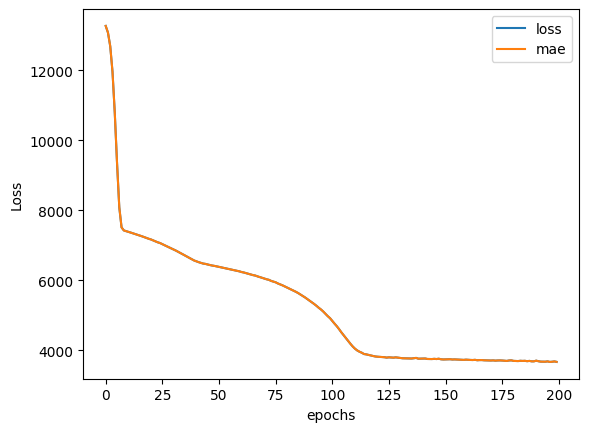

In [16]:
# Plot history (also know as the loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

### Preprocessing Data (normalization and standardization)
In terms of scaling values, neural noetworks tend to prefer normalization.
If you are not sure on which to use we can try both and see the result which one is better.

<Axes: ylabel='Frequency'>

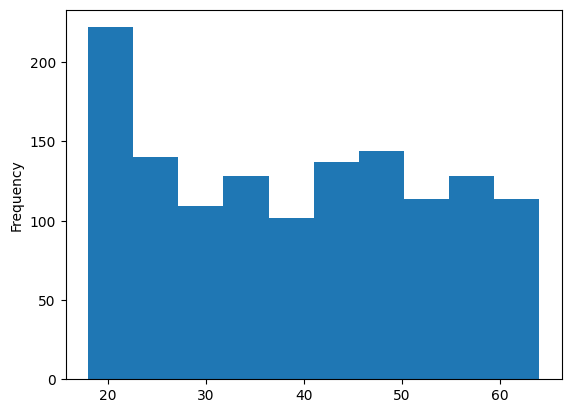

In [17]:
X["age"].plot(kind='hist')

<Axes: ylabel='Frequency'>

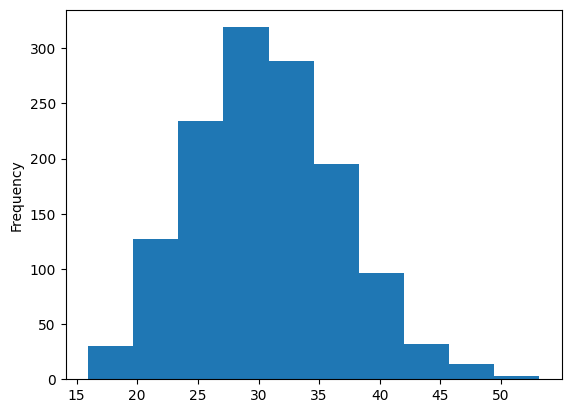

In [18]:
X['bmi'].plot(kind='hist')

#### Let's start from the begining -

In [19]:
# Import requied libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### To prepare our data we can borrow few classes from Scikit-Learn.

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Buuild our train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Fit the colummn transformer to our training data
ct.fit(X_train)

# Transforming training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [22]:
# what does our data look like now ?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [23]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

###### Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [24]:
# Build a neural network model to fit on our normalized data.
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13343.9932 - mae: 13343.9932
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13335.0410 - mae: 13335.0410
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.9385 - mae: 13312.9385
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13266.6973 - mae: 13266.6973
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13185.0996 - mae: 13185.0996
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13057.1475 - mae: 13057.1475
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12872.6582 - mae: 12872.6582
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12621.5762 - mae: 12621.5762
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12293.7285 - mae: 12293.7285
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11886.29

In [25]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3437.0552 - mae: 3437.0552


[3437.05517578125, 3437.05517578125]